In [1]:
import numpy as np
import pandas as pd

# # 1可视化统计

In [2]:
import matplotlib.pyplot as plt
plt.close('all')

In [ ]:
# 同时画两个图
Train_data[['power_bin', 'power']].plot.hist(subplots=True, layout=(-1, 3), figsize=(6, 6))

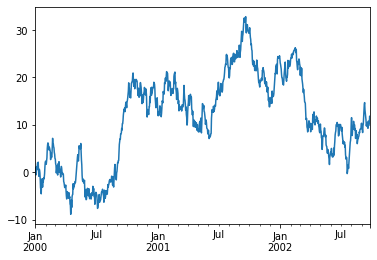

In [3]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

# 2 3. pandas常用

### pandas应用函数，什么时候对DataFrame应用？  
比如：   
df.fillna(0)，它不会在原df上生效。   
df = df.fillna(0)，在原df上生效。   
### python复制与引用的问题，这个也要考虑总结。   

### 如何找到null的数据-》pandas中数据筛选

In [ ]:
df.isnull().sum()#返回Series，展示出所有列的空值统计数据。经常会出现显示不出的情况。[a:b]切片来显示部分。
df.isnull()#返回DataFram，

In [ ]:
a = df.isna().sum()
a[a>0]

In [ ]:
# 筛选
a = train_x[['power','power_bin']]
a[(a['power']<25)&(a['power']>20)]

其他

In [ ]:
type(Train_data['price'])#Series
type(Train_data[['price']])#dataframe

In [ ]:
data.discribe()
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

In [4]:
# np.linspace(a, b, c )
# a开始, b结束, c个数
np.linspace(.1, 1.0, 4 )

array([0.1, 0.4, 0.7, 1. ])

In [5]:
# 类型转换
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)
Train_data['notRepairedDamage'] = pd.to_numeric(Train_data['notRepairedDamage'],errors='coerce')

NameError: name 'sample_feature' is not defined

In [ ]:
通过 .columns 查看列名
Train_data.columns

In [6]:
# column信息, info信息
Train_data.info()

NameError: name 'Train_data' is not defined

In [7]:
# 删除
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop


In [8]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [9]:
df.drop(['B', 'C'], axis=1)

,A,D
0,0,3
1,4,7
2,8,11


In [10]:
# 删除2
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','brand','model']]

NameError: name 'sample_feature' is not defined

In [11]:
# 类型转换
# https://www.cnblogs.com/keye/p/11220497.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html?highlight=to_numeric


In [12]:
import scrapy

In [13]:
# Series
s = pd.Series([1, 1, 5, np.nan, 5, 8])
s.value_counts()

5.0    2
1.0    2
8.0    1
dtype: int64

In [14]:
# DataFrame
df = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [15]:
b = df.apply(pd.value_counts)
b

,A,B,C,D,E,F
1.0,4.0,NaN,4.0,NaN,NaN,NaN
2013-01-02 00:00:00,NaN,4.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,4.0,NaN,NaN
train,NaN,NaN,NaN,NaN,2.0,NaN
test,NaN,NaN,NaN,NaN,2.0,NaN
foo,NaN,NaN,NaN,NaN,NaN,4.0


In [16]:
print(s.mode()[0])
s.median()

1.0


5.0

## 复制
df.copy()

# 特征工程

## 1. 特征分桶
数据分桶是一种数据预处理技术，用于减少次要观察误差的影响，是一种将多个连续值分组为较少数量的“桶”的方法。